In [470]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string


In [770]:
d = pd.read_csv('seek_data_final.csv')

In [771]:
d.head()

,job_title,Date,Salary,job_type,category,location,job_description,search_key
0,Data Analytics & Data Science Team Leader,24 Jan 2019,"$110,172.00 - $119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science
1,"Consultant, Data Scientist",18 Jan 2019,"$130,000 -$140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science
2,Data Scientist,24 Jan 2019,$95k - $105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science
3,Sr. Machine Learning Engineer,5 Feb 2019,"$150,000 - $230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science
4,Business Development | Software in Retail,4 Feb 2019,$60k - $70k p.a. + super + uncapped commissions,Full Time,Sales,Melbourne,b'\n<p>Our client is looking for a hunter to d...,Data Science


In [772]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 8 columns):
job_title          613 non-null object
Date               468 non-null object
Salary             613 non-null object
job_type           613 non-null object
category           613 non-null object
location           613 non-null object
job_description    613 non-null object
search_key         613 non-null object
dtypes: object(8)
memory usage: 38.4+ KB


In [773]:
d.shape

(613, 8)

In [774]:
d.isnull().sum()

job_title            0
Date               145
Salary               0
job_type             0
category             0
location             0
job_description      0
search_key           0
dtype: int64

In [775]:
d.dtypes


job_title          object
Date               object
Salary             object
job_type           object
category           object
location           object
job_description    object
search_key         object
dtype: object

In [1]:
#Dropping dupicates and non-data related jobs

In [776]:
d.drop(index = 548, axis =0, inplace = True)

In [777]:
d.drop(index = 92, axis =0, inplace = True)

In [778]:
d.drop(index = 496, axis = 0, inplace = True)

In [779]:
d.drop(index = 93, axis =0, inplace = True)

In [780]:
d.drop(index = 501, axis =0, inplace = True)

In [781]:
d.shape

(608, 8)

#### Cleaning Job description column

In [411]:
# Removing html tags and punctuations from job_description:
def remover(x):
    x = x.replace('\\xc2', '')
    x =x.replace('\\xa0', '')
    x = x.replace('\\n', '')
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, ' ', x)
    cleaned = re.sub(r'[?|!|\'|#|"]', r'', cleantext)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    cleaned = re.sub(r'^b',r'', cleaned)
    return cleaned

In [783]:
#creating a new cleaned job description column by applying the remover function to job_description column:
d['job_description_cleaned'] = d.job_description.map(remover)

In [784]:
d.job_description_cleaned[0]

' The mission of the AFP is to provide dynamic and effective law enforcement to the people of Australia  It provides policing throughout Australia in relation to the prevention and detection of crimes against the Commonwealth  its laws and integrity           and community police services to the Community of the ACT   Applications are invited from suitably qualified people who are interested in an appointment to the AFP  Applicants should demonstrate a commitment to the core values of the AFP  and their application must address selection criteria and the relevant          work level standards   As an inclusive organisation  the AFP provides opportunity for all Australians to fairly gain employment in the AFP  We appreciate that everyone is unique and acknowledge that diversity in thought leads to greater transparency and improved          consideration in our decision making  To support our employees we also provide flexible work arrangements      Applications must be lodged by 11:59pm

In [785]:
d.head()

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
0,Data Analytics & Data Science Team Leader,24 Jan 2019,"$110,172.00 - $119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...
1,"Consultant, Data Scientist",18 Jan 2019,"$130,000 -$140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...
2,Data Scientist,24 Jan 2019,$95k - $105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...
3,Sr. Machine Learning Engineer,5 Feb 2019,"$150,000 - $230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...
4,Business Development | Software in Retail,4 Feb 2019,$60k - $70k p.a. + super + uncapped commissions,Full Time,Sales,Melbourne,b'\n<p>Our client is looking for a hunter to d...,Data Science,Our client is looking for a hunter to drive s...


In [786]:
# removing $ from salary column
def dollar_remove(x):
    x = x.replace('$', '')
    return x

In [787]:
d.Salary = d.Salary.map(dollar_remove)

In [788]:
d.Salary[405] = '45 - 60 p.h. + Super'

In [811]:
d.tail(150)

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
460,Full Stack Engineer - Python,31 Jan 2019,"100,000 - 130,000 + super",Full Time,Marketing & Communications,Sydney,b'You\'ll have the opportunity to influence an...,Data Scientist,You\ll have the opportunity to influence and s...
461,Data Engineer,11 Jan 2019,650 - 825 p.a. + competitive,Contract/Temp,Information & Communication Technology,Sydney,b'\n<p><strong>Data Engineer- Financial Servic...,Data Scientist,Data Engineer- Financial Services- Sydney CB...
462,Senior Data Engineer - Location & Segment Anal...,14 Jan 2019,145000 - 155000.00 per annum,Full Time,Information & Communication Technology,Sydney,b'<strong>Senior Data Engineer - Northern Subu...,Data Scientist,Senior Data Engineer - Northern Suburbs Locat...
463,Big Data Engineer,21 Jan 2019,110k - 150k p.a. + plus super,Full Time,Information & Communication Technology,Sydney,b'\n<ul>\n<li>Exciting large scale data projec...,Data Scientist,Exciting large scale data projects A mixtu...
464,Data Steward,16 Jan 2019,100-120k base + super + bonus,Full Time,Engineering,Sydney,b'\n<p><strong>Data Steward </strong><br/>I\xe...,Data Scientist,Data Steward I\xe2\x80\x99m currently look...
465,Operations Research/Modelling & Simulation/Dat...,21 Jan 2019,"66,436 - 91,238 (plus super)",Full Time,Science & Technology,Sydney,b'\n<p>Science and Technology &gt; Mathematics...,Data Scientist,Science and Technology &gt; Mathematics Stat...
466,Data Steward - Governance & Data Management,16 Jan 2019,"Up to 140,000 plus super",Full Time,Information & Communication Technology,Sydney,b'\n<p>We are looking for a Data Steward for o...,Data Scientist,We are looking for a Data Steward for one of ...
467,Data Engineer - Machine Learning,29 Jan 2019,"AU111,663 - AU130,848 plus up to 15.4% super",Full Time,Government & Defence,Sydney,"b'\n<div class=""videoembed"" id=""FlashContent"">...",Data Scientist,The Position CSIRO\xe2\x80\x99s Data61...
468,Data Analyst,NaN,"84,019 - 95,329 plus super",Full Time,Consulting & Strategy,Melbourne,b'<ul>\n<li>Are you a data guru looking for a ...,Data Analyst,Are you a data guru looking for a greenfield...
469,Data Analyst,NaN,750 per day,Contract/Temp,Information & Communication Technology,Melbourne,b'Q1 requires a candidate with experience in\x...,Data Analyst,Q1 requires a candidate with experience in Dat...


In [812]:
d.to_csv('final_data_seek_job_cleaned', index= False)

In [480]:
df = pd.read_csv('final_data_seek_job_cleaned', sep = ',')

In [921]:
#df.drop(index = 315, axis = 0, inplace = True)

In [481]:
df.shape

(600, 9)

In [482]:
df.Salary[538] = '600 - 900 p.d.'

In [483]:
df.Salary[211] = '85k - 90k'

In [476]:
df.to_csv('final_data_seek_job_cleaned', index= False)

In [487]:
def clean_sal(x):
    cl = re.compile('[a-z|/|A-Z|./,|+|&|(|)|%]')
    x = re.sub(cl, r'', x)
    x = x.replace(' ', '')
    return x

In [488]:
df['new_sal'] = df.Salary.map(clean_sal)

In [489]:
df.new_sal

0      11017200-11992100
1          130000-140000
2                 95-105
3          150000-230000
4                  60-70
5                900-960
6                   1000
7          110000-130000
8          150000-170000
9          160000-180000
10               140-160
11              10000000
12                180000
13               150-175
14                700800
15               600-750
16               100-120
17         130000-150000
18               600-750
19         69148-9383017
20               400-415
21               600-750
22     13500000-14500000
23                 80-90
24               130-150
25          90000-140000
26           84019-95329
27           84019-95329
28                90-100
29           67866-82404
             ...        
570    11500000-13000000
571                55000
572    11500000-13000000
573              600-650
574                35-40
575              750-850
576              700-800
577         87185-106074
578                45-50


In [591]:
df[df.index >400] 

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal
401,Commercial Analyst | International Business | ...,15 Jan 2019,45 - 60 p.h. + Super,Contract/Temp,Retail & Consumer Products,Melbourne,b'\n<p><strong>The Company</strong><br/>Workin...,Data Analytics,The Company Working for a globally recogniz...,45-60
402,Local Buy-In Co-ordinator,11 Jan 2019,Attractive Salary + Super!,Full Time,Information & Communication Technology,Melbourne,b'<br/>\n<ul>\n<li><strong>Challenging and Rew...,Data Analytics,Challenging and Rewarding role A role t...,!
403,Asset Manager - Facilities Management,23 Jan 2019,Package based on experience 100k - 120k + Super,Full Time,Retail & Consumer Products,Melbourne,"b""\n<p><strong>Our client is a major provider ...",Data Analytics,Our client is a major provider of facilityma...,100-120
404,"Sample Receipt Officer - Springvale, VIC",18 Jan 2019,Part Time,Share this role,Sales,Melbourne,b'<strong>About the Position</strong><br/>The ...,Data Analytics,About the Position The Environmental busines...,
405,Mandarin Speaking IT Field Service Desk Analyst,16 Jan 2019,25-30/hour depending on the experience,Part Time,Information & Communication Technology,Melbourne,b'Staff Solutions Australia is currently seeki...,Data Analytics,Staff Solutions Australia is currently seeking...,25-30
406,Korean Speaking IT Field Service Desk Analyst,16 Jan 2019,25-30/hour depending on the experience,Part Time,Accounting,Melbourne,b'Staff Solutions Australia is currently seeki...,Data Analytics,Staff Solutions Australia is currently seeking...,25-30
407,Security Analyst,18 Jan 2019,90000 - 100000 per annum,Full Time,Engineering,Melbourne,b'<strong>Security Analyst</strong><br/>We are...,Data Analytics,Security Analyst We are currently looking fo...,90000-100000
408,Corporate Counsel,11 Jan 2019,Part Time,Share this role,Human Resources & Recruitment,Melbourne,b'\n<ul>\n<li><strong>Permanent part time oppo...,Data Analytics,Permanent part time opportunity- 3 days per...,
409,HR Leader,11 Jan 2019,Great rate + Super + Salary Packaging(tax bene...,Full Time,Accounting,Melbourne,"b'\n<p style=""text-align:justify;"">We are seek...",Data Analytics,We are seeking a talented committed and enth...,
410,Tax Manager - Top 100 listed business,24 Jan 2019,160k - 170k p.a. + bonus,Full Time,"Advertising, Arts & Media",Melbourne,b'\n<p><strong>Tax Manager - Top 100 listed bu...,Data Analytics,Tax Manager - Top 100 listed business O...,160-170


In [553]:
df[(df.index >30) & (df.index <300)]

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal
31,Data Analyst (SAS & SQL),14 Jan 2019,110k - 125k p.a.,Full Time,Banking & Financial Services,Melbourne,b'\n<p>A leading and growing Australian organi...,Data Science,A leading and growing Australian organization...,110-125
32,"Systems Analyst, Fulltime, Essendon",8 Feb 2019,"80,000 to 100,000 + super",Full Time,Information & Communication Technology,Melbourne,b'\n<p><em>Part of the Linfox Armaguard Group ...,Data Science,Part of the Linfox Armaguard Group Pty Ltd ...,80000100000
33,"Developer - C#, ASP.Net, MVC, DDD and Xamarin",24 Jan 2019,90 - 110k package + training,Full Time,Information & Communication Technology,Melbourne,b'Torch Professional Services is a people-focu...,Data Science,Torch Professional Services is a people-focuse...,90-110
34,Associate Research Fellow - Education,5 Feb 2019,"67,562 - 90,827 pa pro rata plus 17% super",Part Time,Education & Training,Melbourne,b'\n<p><strong>The role</strong></p>\n<p>Worki...,Data Science,The role Working within the Faculty of Art...,67562-9082717
35,Biological Scientist,25 Jan 2019,"66,436 - 91,238 (plus super)",Full Time,Government & Defence,Melbourne,b'\n<p>Defence Science &amp; Technology Group<...,Data Science,Defence Science &amp; Technology Group APS L...,66436-91238
36,Information Security Analyst,8 Feb 2019,800 - 850,Contract/Temp,Information & Communication Technology,Melbourne,b'<strong>Information Security Analyst (Contra...,Data Science,Information Security Analyst Contract M...,800-850
37,Research Security Services Coordinator,4 Feb 2019,"67,100 - 73,256 (plus Super)",Full Time,Government & Defence,Melbourne,b'\n<ul>\n<li>Do you want to work in an enviro...,Data Science,Do you want to work in an environment that i...,67100-73256
38,Snr Python Developer - Wealth Management,4 Feb 2019,950 pd + gst,Contract/Temp,Information & Communication Technology,Melbourne,b'<strong>Company Overview<br/> </strong><br/>...,Data Science,Company Overview Profusion is delighted t...,950
39,Integration Analyst (Clinical Healthcare Syste...,7 Feb 2019,110K (including 9.5% super),Full Time,Information & Communication Technology,Melbourne,b'\n<p>This is an excellent permanent opportun...,Data Science,This is an excellent permanent opportunity fo...,11095
40,.NET developer,5 Feb 2019,550 - 700 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,"b'\n<p style=""text-align:left;""><strong>The Co...",Data Science,The Company Technology doesn\xe2\x80\x99t...,550-700


In [611]:
df['sal_split'] = df.new_sal.str.split('-')

In [ ]:
df['low'] = df.sal_split

In [612]:
df.sal_split

0      [110172, 119921]
1      [130000, 140000]
2       [90000, 105000]
3      [150000, 230000]
5            [900, 960]
6      [200000, 240000]
7      [110000, 130000]
8      [150000, 170000]
9      [160000, 180000]
10     [140000, 160000]
11      [90000, 100000]
12             [180000]
13     [150000, 175000]
14       [70000, 80000]
15           [600, 750]
16           [100, 120]
17     [130000, 150000]
18           [600, 750]
19       [69000, 93800]
20           [400, 415]
21           [600, 750]
22     [135000, 145000]
23             [80, 90]
24           [130, 150]
25      [90000, 140000]
26       [84019, 95329]
27       [84019, 95329]
28            [90, 100]
29       [67866, 82404]
30            [80, 100]
             ...       
565          [100, 130]
566    [170000, 200000]
567      [87249, 95695]
568            [137000]
569      [60000, 69999]
570    [115000, 130000]
572    [115000, 130000]
573          [600, 650]
574            [35, 40]
575          [750, 850]
576          [70

In [617]:
def low_sal(x):
    x = x[0]
    return x

In [618]:
df['low'] = df.sal_split.map(low_sal)

In [621]:
def high_sal(x):
    try:
        x = x[1]
    except:
        x = 0
    return x

In [622]:
df['high'] = df.sal_split.map(high_sal)

In [626]:
df[(df.index >30 ) & (df.index <500)]

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal,sal_split,low,high
31,Data Analyst (SAS & SQL),14 Jan 2019,110k - 125k p.a.,Full Time,Banking & Financial Services,Melbourne,b'\n<p>A leading and growing Australian organi...,Data Science,A leading and growing Australian organization...,110000-125000,"[110000, 125000]",110000,125000
32,"Systems Analyst, Fulltime, Essendon",8 Feb 2019,"80,000 to 100,000 + super",Full Time,Information & Communication Technology,Melbourne,b'\n<p><em>Part of the Linfox Armaguard Group ...,Data Science,Part of the Linfox Armaguard Group Pty Ltd ...,80000-100000,"[80000, 100000]",80000,100000
34,Associate Research Fellow - Education,5 Feb 2019,"67,562 - 90,827 pa pro rata plus 17% super",Part Time,Education & Training,Melbourne,b'\n<p><strong>The role</strong></p>\n<p>Worki...,Data Science,The role Working within the Faculty of Art...,67562-9082717,"[67562, 9082717]",67562,9082717
35,Biological Scientist,25 Jan 2019,"66,436 - 91,238 (plus super)",Full Time,Government & Defence,Melbourne,b'\n<p>Defence Science &amp; Technology Group<...,Data Science,Defence Science &amp; Technology Group APS L...,66436-91238,"[66436, 91238]",66436,91238
36,Information Security Analyst,8 Feb 2019,800 - 850,Contract/Temp,Information & Communication Technology,Melbourne,b'<strong>Information Security Analyst (Contra...,Data Science,Information Security Analyst Contract M...,800-850,"[800, 850]",800,850
37,Research Security Services Coordinator,4 Feb 2019,"67,100 - 73,256 (plus Super)",Full Time,Government & Defence,Melbourne,b'\n<ul>\n<li>Do you want to work in an enviro...,Data Science,Do you want to work in an environment that i...,67100-73256,"[67100, 73256]",67100,73256
38,Snr Python Developer - Wealth Management,4 Feb 2019,950 pd + gst,Contract/Temp,Information & Communication Technology,Melbourne,b'<strong>Company Overview<br/> </strong><br/>...,Data Science,Company Overview Profusion is delighted t...,950,[950],950,0
39,Integration Analyst (Clinical Healthcare Syste...,7 Feb 2019,110K (including 9.5% super),Full Time,Information & Communication Technology,Melbourne,b'\n<p>This is an excellent permanent opportun...,Data Science,This is an excellent permanent opportunity fo...,11095,[11095],11095,0
40,.NET developer,5 Feb 2019,550 - 700 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,"b'\n<p style=""text-align:left;""><strong>The Co...",Data Science,The Company Technology doesn\xe2\x80\x99t...,550-700,"[550, 700]",550,700
42,Data Analyst,8 Feb 2019,"87,249 - 95,695 pa HEW 07 (plus 17% super)",Full Time,Consulting & Strategy,Melbourne,b'\n<p><strong>Job No.:</strong> 587981</p>\n<...,Data Science,Job No : 587981 Location: Clayton Campus ...,87249-95695,"[87249, 95695]",87249,95695


In [625]:
df.head()

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal,sal_split,low,high
0,Data Analytics & Data Science Team Leader,24 Jan 2019,"110,172.00 - 119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...,110172-119921,"[110172, 119921]",110172,119921
1,"Consultant, Data Scientist",18 Jan 2019,"130,000 -140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...,130000-140000,"[130000, 140000]",130000,140000
2,Data Scientist,24 Jan 2019,95k - 105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...,90000-105000,"[90000, 105000]",90000,105000
3,Sr. Machine Learning Engineer,5 Feb 2019,"150,000 - 230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...,150000-230000,"[150000, 230000]",150000,230000
5,Senior Data Scientist,30 Jan 2019,900 - 960 per day,Contract/Temp,Information & Communication Technology,Melbourne,b'This is an exciting opportunity to join a le...,Data Science,This is an exciting opportunity to join a lead...,900-960,"[900, 960]",900,960


In [627]:
df.drop(columns =['Date'], axis = 1, inplace = True)

In [433]:
# Writing a function to extract the index of Salary which has only per hour rate:
per_hour = []
def clean_sal_hr(x):
    for i, v in enumerate(x):
        l = re.findall('p[er/./]h', v)
        if l== []:
            pass
        else:
            per_hour.append(i)
            

In [434]:
# passing salary feature to the function to extract only hour rate index:
clean_sal_hr(df.Salary)

In [435]:
#Writing a function to extract the index of Salary which has only per day rate:
per_day = []
def clean_sal_pd(x):
    for i, v in enumerate(x):
        l = re.findall('p[er/./]d[./ay]', v)
        if l== []:
            pass
        else:
            per_day.append(i)
            

In [436]:
# passing salary feature to the day function:
clean_sal_pd(df.Salary)

In [437]:
#Writing a function to extract the index of Salary which has only per annum/k rate:
short_k = []
def clean_sal_k(x):
    for i, v in enumerate(x):
        l = re.findall('[0-9](?=k)', v)
        if l== []:
            pass
        else:
            short_k.append(i)

In [438]:
#passing salary feature to extract per annum / k salary:
clean_sal_k(df.Salary)

In [439]:
per_hour

[174,
 183,
 192,
 209,
 236,
 238,
 266,
 354,
 384,
 387,
 396,
 402,
 468,
 476,
 486,
 504,
 506,
 526,
 577,
 583,
 593,
 594]

In [440]:
#salary per hour:
h = df.iloc[per_hour,-7]

In [441]:
h

174                           60 - 75 p.h.
183             61.00 - 73.00 p.h. + Super
192                   30 - 37 p.h. + super
209                          65 - 101 p.h.
236                     38.00 - 40.00 p.h.
238             38.00 - 40.00 p.h. + Super
266                           40 - 50 p.h.
354                   32 - 35 p.h. + Super
384    40.00 - 45.00 p.h. + superannuation
387             61.00 - 73.00 p.h. + Super
396    40.00 - 45.00 p.h. + superannuation
402                   45 - 60 p.h. + Super
468             61.00 - 73.00 p.h. + Super
476                   35 - 40 p.h. + super
486                           40 - 50 p.h.
504                  50 - 60 p.h. + super 
506              45 - 55 p.h. + plus super
526                   35 - 40 p.h. + Super
577                   35 - 40 p.h. + super
583                           40 - 50 p.h.
593                    50 - 60 p/h + super
594                   35 - 40 p.h. + Super
Name: Salary, dtype: object

In [344]:
h.index

Int64Index([175, 184, 193, 210, 237, 239, 267, 355, 385, 388, 397, 403, 471,
            479, 489, 507, 509, 529, 580, 586, 597, 598],
           dtype='int64')

In [442]:
# Cleaning and calculating salary from per hour to per annum
for i in h.index:
    s = df.Salary[i]
    clean = re.compile('(.00)')
    cl = re.sub(clean, ' ', s)
    s = re.sub(r'[a-z|/|A-Z|.|+]', r'', cl)
    s = s.replace(' ', '')
    s = s.split('-')
    try:
        s = int(s[0]) *1920, int(s[1]) * 1920
        
    except:
        s = 0
    df.Salary[i] = s
        


In [346]:
df.Salary[175]

(115200, 144000)

In [443]:
per_day

[15,
 18,
 20,
 21,
 40,
 93,
 97,
 137,
 165,
 179,
 197,
 227,
 228,
 248,
 258,
 259,
 299,
 303,
 312,
 328,
 334,
 335,
 344,
 350,
 365,
 420,
 427,
 444,
 454,
 479,
 487,
 488,
 521,
 531,
 535,
 539,
 560,
 578]

In [377]:
df.iloc[per_day, :]

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
15,Business Analyst | Digital,1 Feb 2019,600 - 750 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a supply chain ...
18,Business Analyst | $600-$750 | Global Impact,24 Jan 2019,600 - 750 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a supply chain ...
20,Business Intelligence/ ETL Developer,30 Jan 2019,400 - 415 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p>The role will combine full stack Micros...",Data Science,The role will combine full stack Microsoft Az...
21,Business Analyst | $600-$750 | Global Impact,21 Jan 2019,600 - 750 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a unique supply...
40,.NET developer,5 Feb 2019,550 - 700 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,"b'\n<p style=""text-align:left;""><strong>The Co...",Data Science,The Company Technology doesn\xe2\x80\x99t...
94,Business Intelligence/ ETL Developer,30 Jan 2019,400 - 415 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p>The role will combine full stack Micros...",Data Analytics,The role will combine full stack Microsoft Az...
98,MDM Lead,7 Feb 2019,600 - 900 p.d. + competitive,Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p><strong>MDM Consultant/Architect</stron...",Data Analytics,MDM Consultant Architect The focus of y...
138,Security Lead/Security Solution Strategist,21 Jan 2019,500 - 650 p.d.,Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>Description:</strong></p>\n<p>S...,Data Analytics,Description: Security Lead SOC Positio...
166,Lead Data Security Analyst,29 Jan 2019,600 - 700 p.d.,Contract/Temp,Administration & Office Support,Melbourne,b'\n<p><strong>Your new role:</strong><br/>The...,Data Analytics,Your new role: The lead will have a deep un...
180,Data Analyst / Technical BA,15 Jan 2019,450 - 650 p.d. + Super,Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p>What is in it for you?</p>\n<ul>\n<li>W...,Data Analytics,What is in it for you Work as part of a lar...


In [378]:
df.Salary

0                               110,172.00 - 119,921.00
1                                      130,000 -140,000
2                      95k - 105k p.a. + superannuation
3                             150,000 - 230,000 package
4         60k - 70k p.a. + super + uncapped commissions
5                                     900 - 960 per day
6                                                  1000
7                                     110,000 - 130,000
8                                     150,000 - 170,000
9                                     160,000 - 180,000
10                                     140k - 160k p.a.
11                                 Up to 100000.00 p.a.
12                                               180000
13                                             150-175k
14                                           700 to 800
15                                       600 - 750 p.d.
16                                  100K - 120K + Super
17                                    130,000 - 

In [444]:
m = df.iloc[per_day, -7]

In [445]:
m

15                      600 - 750 p.d.
18                      600 - 750 p.d.
20                      400 - 415 p.d.
21                      600 - 750 p.d.
40                      550 - 700 p.d.
93                      400 - 415 p.d.
97        600 - 900 p.d. + competitive
137                     500 - 650 p.d.
165                     600 - 700 p.d.
179            450 - 650 p.d. + Super 
197                     500 - 650 p.d.
227                     600 - 750 p.d.
228                     500 - 700 p.d.
248                     500 - 700 p.d.
258             580 - 620 p.d. + super
259             580 - 620 p.d. + super
299                     600 - 750 p.d.
303                     600 - 700 p.d.
312    Up to 900 p.d. + superannuation
328                     800 - 850 p.d.
334                     660 - 670 p.d.
335                     600 - 750 p.d.
344                     600 - 750 p.d.
350                     600 - 700 p.d.
365                     750 - 825 p.d.
420       650 - 850 p.d. 

In [446]:
# Cleaning & Coverting all per day to per annum:
for i in m.index:
    s = df.Salary[i]
    cl = re.compile('(Up to)')
    s = re.sub(cl, '600-', s)
    s = re.sub(r'[a-z|/|A-Z|.|+]', r'', s)
    s = s.replace(' ', '')
    s = s.split('-')
    try:
        s = int(s[0]) * 240, int(s[1]) * 240
    except:
        s =0
    df.Salary[i] = s

In [298]:
df.Salary[336]

(144000, 180000)

In [383]:
df.iloc[per_day, :]

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
15,Business Analyst | Digital,1 Feb 2019,"(144000, 180000)",Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a supply chain ...
18,Business Analyst | $600-$750 | Global Impact,24 Jan 2019,"(144000, 180000)",Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a supply chain ...
20,Business Intelligence/ ETL Developer,30 Jan 2019,"(96000, 99600)",Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p>The role will combine full stack Micros...",Data Science,The role will combine full stack Microsoft Az...
21,Business Analyst | $600-$750 | Global Impact,21 Jan 2019,"(144000, 180000)",Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>The Company<br/></strong></p>\n...,Data Science,The Company Our client is a unique supply...
40,.NET developer,5 Feb 2019,"(132000, 168000)",Contract/Temp,Information & Communication Technology,Melbourne,"b'\n<p style=""text-align:left;""><strong>The Co...",Data Science,The Company Technology doesn\xe2\x80\x99t...
94,Business Intelligence/ ETL Developer,30 Jan 2019,"(96000, 99600)",Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p>The role will combine full stack Micros...",Data Analytics,The role will combine full stack Microsoft Az...
98,MDM Lead,7 Feb 2019,"(144000, 216000)",Contract/Temp,Information & Communication Technology,Melbourne,"b""\n<p><strong>MDM Consultant/Architect</stron...",Data Analytics,MDM Consultant Architect The focus of y...
138,Security Lead/Security Solution Strategist,21 Jan 2019,"(120000, 156000)",Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p><strong>Description:</strong></p>\n<p>S...,Data Analytics,Description: Security Lead SOC Positio...
166,Lead Data Security Analyst,29 Jan 2019,"(144000, 168000)",Contract/Temp,Administration & Office Support,Melbourne,b'\n<p><strong>Your new role:</strong><br/>The...,Data Analytics,Your new role: The lead will have a deep un...
180,Data Analyst / Technical BA,15 Jan 2019,"(108000, 156000)",Contract/Temp,Information & Communication Technology,Melbourne,b'\n<p>What is in it for you?</p>\n<ul>\n<li>W...,Data Analytics,What is in it for you Work as part of a lar...


In [384]:
df.head(100)

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
0,Data Analytics & Data Science Team Leader,24 Jan 2019,"110,172.00 - 119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...
1,"Consultant, Data Scientist",18 Jan 2019,"130,000 -140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...
2,Data Scientist,24 Jan 2019,95k - 105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...
3,Sr. Machine Learning Engineer,5 Feb 2019,"150,000 - 230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...
4,Business Development | Software in Retail,4 Feb 2019,60k - 70k p.a. + super + uncapped commissions,Full Time,Sales,Melbourne,b'\n<p>Our client is looking for a hunter to d...,Data Science,Our client is looking for a hunter to drive s...
5,Senior Data Scientist,30 Jan 2019,900 - 960 per day,Contract/Temp,Information & Communication Technology,Melbourne,b'This is an exciting opportunity to join a le...,Data Science,This is an exciting opportunity to join a lead...
6,Data Engineer,24 Jan 2019,1000,Full Time,Information & Communication Technology,Melbourne,b'Data Engineer required to build applications...,Data Science,Data Engineer required to build applications t...
7,Data Modeller,1 Feb 2019,"110,000 - 130,000",Full Time,Science & Technology,Melbourne,"b""\n<p><strong>About our Client</strong><br/><...",Data Science,About our Client I am currently working wi...
8,Big Data Architect,24 Jan 2019,"150,000 - 170,000",Full Time,Information & Communication Technology,Melbourne,"b""\n<p>In this role as a Sr. Technical Archite...",Data Science,In this role as a Sr Technical Architect yo...
9,Big Data Architect,17 Jan 2019,"160,000 - 180,000",Full Time,Information & Communication Technology,Melbourne,"b""\n<p><strong>Big Data Architect</strong><br/...",Data Science,Big Data Architect Location: Melbourne ...


In [447]:
# per annum
short_k

[2,
 4,
 10,
 13,
 23,
 24,
 28,
 30,
 31,
 33,
 73,
 79,
 80,
 81,
 83,
 84,
 127,
 133,
 136,
 138,
 148,
 153,
 154,
 168,
 170,
 191,
 210,
 217,
 225,
 231,
 234,
 240,
 241,
 242,
 246,
 247,
 252,
 261,
 273,
 278,
 294,
 297,
 301,
 306,
 317,
 322,
 324,
 333,
 353,
 363,
 370,
 373,
 380,
 388,
 389,
 393,
 404,
 411,
 412,
 413,
 419,
 421,
 422,
 423,
 426,
 428,
 429,
 430,
 431,
 432,
 439,
 440,
 445,
 452,
 458,
 459,
 467,
 473,
 477,
 484,
 499,
 500,
 507,
 512,
 528,
 534,
 540,
 552,
 557,
 561,
 581,
 585,
 595]

In [386]:
df.iloc[short_k, :]

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
2,Data Scientist,24 Jan 2019,95k - 105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...
4,Business Development | Software in Retail,4 Feb 2019,60k - 70k p.a. + super + uncapped commissions,Full Time,Sales,Melbourne,b'\n<p>Our client is looking for a hunter to d...,Data Science,Our client is looking for a hunter to drive s...
10,Lead Data Scientist,20 Jan 2019,140k - 160k p.a.,Full Time,Information & Communication Technology,Melbourne,b'\n<ul>\n<li>Seeking an experienced Lead Data...,Data Science,Seeking an experienced Lead Data Scientist M...
13,Data Scientist,11 Jan 2019,150-175k,Full Time,Information & Communication Technology,Melbourne,b'\n<p>As a\xc2\xa0major provider in the the M...,Data Science,As amajor provider in the the Melbourne marke...
23,Environmental Advisor - Western Suburbs - Majo...,22 Jan 2019,80k - 90k,Full Time,Engineering,Melbourne,b'\n<div><strong>The Company</strong><br/> \xc...,Data Science,The Company This company is a major infr...
24,Manager Systems Intelligence and Analytics,7 Feb 2019,130k - 150k p.a. + Eastern Location,Full Time,Information & Communication Technology,Melbourne,b'\n<p><strong>My Client:</strong></p>\n<p>Wit...,Data Science,My Client: With their partners my client ...
28,BI Developer/Analyst,17 Jan 2019,"90k - 100k p.a. + Competitive Salary, Inner city",Full Time,Information & Communication Technology,Melbourne,b'\n<p><strong>The Client: </strong><br/> My c...,Data Science,The Client: My client is a national healt...
30,Sustainability Advisor - Western Suburbs - Maj...,22 Jan 2019,80k - 100k,Full Time,Engineering,Melbourne,b'\n<div><strong>The Company</strong><br/> \xc...,Data Science,The Company This company is a major infr...
31,Data Analyst (SAS & SQL),14 Jan 2019,110k - 125k p.a.,Full Time,Banking & Financial Services,Melbourne,b'\n<p>A leading and growing Australian organi...,Data Science,A leading and growing Australian organization...
33,"Developer - C#, ASP.Net, MVC, DDD and Xamarin",24 Jan 2019,90 - 110k package + training,Full Time,Information & Communication Technology,Melbourne,b'Torch Professional Services is a people-focu...,Data Science,Torch Professional Services is a people-focuse...


In [448]:
q = df.iloc[short_k, -7]

In [266]:
df.head(100)

,job_title,Date,Salary,job_type,category,location,job_description,search_key,job_description_cleaned
0,Data Analytics & Data Science Team Leader,24 Jan 2019,"110,172.00 - 119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...
1,"Consultant, Data Scientist",18 Jan 2019,"130,000 -140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...
2,Data Scientist,24 Jan 2019,"(22800, 25200)",Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...
3,Sr. Machine Learning Engineer,5 Feb 2019,"150,000 - 230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...
4,Business Development | Software in Retail,4 Feb 2019,"(14400, 16800)",Full Time,Sales,Melbourne,b'\n<p>Our client is looking for a hunter to d...,Data Science,Our client is looking for a hunter to drive s...
5,Senior Data Scientist,30 Jan 2019,900 - 960 per day,Contract/Temp,Information & Communication Technology,Melbourne,b'This is an exciting opportunity to join a le...,Data Science,This is an exciting opportunity to join a lead...
6,Data Engineer,24 Jan 2019,1000,Full Time,Information & Communication Technology,Melbourne,b'Data Engineer required to build applications...,Data Science,Data Engineer required to build applications t...
7,Data Modeller,1 Feb 2019,"110,000 - 130,000",Full Time,Science & Technology,Melbourne,"b""\n<p><strong>About our Client</strong><br/><...",Data Science,About our Client I am currently working wi...
8,Big Data Architect,24 Jan 2019,"150,000 - 170,000",Full Time,Information & Communication Technology,Melbourne,"b""\n<p>In this role as a Sr. Technical Archite...",Data Science,In this role as a Sr Technical Architect yo...
9,Big Data Architect,17 Jan 2019,"160,000 - 180,000",Full Time,Information & Communication Technology,Melbourne,"b""\n<p><strong>Big Data Architect</strong><br/...",Data Science,Big Data Architect Location: Melbourne ...


In [395]:
q.drop(index = 442, axis =0, inplace = True)

In [449]:
for i in q.index:
    s = df.Salary[i]
    cl = re.compile('[a-z|/|A-Z|.|+|%|&|,]')
    s = re.sub(cl, r' ', s)
    s = s.replace(' ', '')
    s = s.split('-')
    try:
        s = int(s[0]) * 1000, int(s[1]) * 1000
    except:
        s =0
    df.Salary[0] = s


In [452]:
df.Salary[607] = '100000- 130000'

In [162]:
df.drop(index = 607, axis = 0, inplace = True)

In [164]:
def float_chk(x):
    x = float(x)
    return x
    

In [148]:
df.Salary

0      [11017200, 11992100]
1          [130000, 140000]
2                 [95, 105]
3          [150000, 230000]
4                  [60, 70]
5                [900, 960]
6                    [1000]
7          [110000, 130000]
8          [150000, 170000]
9          [160000, 180000]
10               [140, 160]
11               [10000000]
12                 [180000]
13               [150, 175]
14                 [700800]
15               [600, 750]
16               [100, 120]
17         [130000, 150000]
18               [600, 750]
19        [69148, 9383017%]
20               [400, 415]
21               [600, 750]
22     [13500000, 14500000]
23                 [80, 90]
24               [130, 150]
25          [90000, 140000]
26           [84019, 95329]
27           [84019, 95329]
28                [90, 100]
29           [67866, 82404]
               ...         
577                 [55000]
578    [11500000, 13000000]
579              [600, 650]
580                [35, 40]
581              [75

In [649]:
df.tail(50)

,job_title,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal,sal_split,low,high
541,Financial Planning & Systems Manager | Circa $...,"Circa 130,000 package",Full Time,Accounting,Melbourne,b'<strong>Full Job Description:<br/></strong><...,Data Analyst,Full Job Description: Attribute Group has ...,130000,[130000],130000,0
542,Financial Accountant FTC,"65,000 - 80,000 + Super",Contract/Temp,Accounting,Melbourne,"b""<p>Digital Copywriter VPS4 5 Month Role Vict...",Data Analyst,Digital Copywriter VPS4 5 Month Role Victoria...,65000-80000,"[65000, 80000]",65000,80000
543,Financial Planning & Systems Manager | Circa $...,"Circa 130,000",Full Time,Accounting,Melbourne,b'<p><strong>Company Description</strong></p> ...,Data Analyst,Company Description We\xe2\x80\x99re a...,130000,[130000],130000,0
544,Business Development Manager - Telstra,"60,000 - 79,999 base plus commission",Full Time,Sales,Melbourne,b'<p><em><strong>We exist to enrich community ...,Data Analyst,We exist to enrich community experiences W...,60000-79999,"[60000, 79999]",60000,79999
545,Financial Controller,"120,000 - 149,999",Full Time,Accounting,Melbourne,b'<p>Business Development Manager require\xc2\...,Data Analyst,Business Development Manager requirefor Telst...,120000-149999,"[120000, 149999]",120000,149999
546,"""Japanese-speaking"" Business Administration/Sa...","up to 60,000 plus super",Full Time,Administration & Office Support,Melbourne,"b""<p>This privately-owned business that operat...",Data Analyst,This privately-owned business that operates i...,60000,[60000],60000,0
548,BTB - Telecommunications Hardware Provisioning...,"60,000 - 64,999",Full Time,Information & Communication Technology,Melbourne,b'<p><strong>The role</strong></p> <p>\xc2\xa0...,Data Analyst,The role Reporting to the National Rec...,60000-64999,"[60000, 64999]",60000,64999
549,Finance Analyst,80k - 90k p.a. + Super,Full Time,Accounting,Melbourne,"b""<ul> <li><strong>Exciting opportunity to joi...",Data Analyst,Exciting opportunity to join our collabora...,80-90,"[80, 90]",80000,90000
550,Customer Success Manager,"100,000 - 140,000 per year",Full Time,Information & Communication Technology,Melbourne,b'<p><strong>Who is Virgin Pulse?</strong></p>...,Data Analyst,Who is Virgin Pulse At Virgin Pulse part...,100000-140000,"[100000, 140000]",100000,140000
551,Grants & Financial Risk Analyst,60-75 per hoour plus super,Contract/Temp,Banking & Financial Services,Melbourne,"b""<h2><strong>At Porsche we don\xe2\x80\x99t j...",Data Analyst,At Porsche we don\xe2\x80\x99t just make spo...,60-75,"[60, 75]",115000,144000


In [648]:
df.low[551] = '115000'

In [651]:
df.drop(index = 565, axis =0, inplace = True)

In [632]:
df.high.unique()

array(['119921', '140000', '105000', '230000', '960', '240000', '130000',
       '170000', '180000', '160000', '100000', 0, '175000', '80000',
       '750', '120', '150000', '93800', '415', '145000', '90', '150',
       '95329', '100', '82404', '125000', '9082717', '91238', '850',
       '73256', '700', '95695', '110000', '900', '120000', '125', '110',
       '199', '95000', '90928154', '190', '220000', '129999', '135338154',
       '85000', '13000030', '£13000000', '120000:', '50896', '£17000000',
       '160', '650', '130', '956950717', '£18000000', '1020', '70000',
       '!!', '105', '95', '550:1', '75', '99999', '7300', '95695795',
       '115', '37', '800', '96398', '117297', '11000000', '90000', '101',
       '83415', '', '140', '55', '4000', '50', '200', '45', '69999',
       '620', '60', '93800:98775', '10471717', '9383017', '91000', '250',
       '175', '!', '121546917', '80', '92145', '89999', '12010', '670',
       '11500000', '13000000', '108642', '35', '64999', '12000000:

In [634]:
df.dropna(axis =0, inplace = True)

In [637]:
def drp(x):
    if '!' in x:
        x =0
    elif '' in x:
        x = 0
    elif ':' in x:
        x =0
    return x

In [652]:
df.to_csv('final_sal_cleaned_seek_data_18th.csv', index = False)

In [2]:
df = pd.read_csv('final_sal_cleaned_seek_data_18th.csv', sep = ',')

In [3]:
df.head()

,job_title,Salary,job_type,category,location,job_description,search_key,job_description_cleaned,new_sal,sal_split,low,high
0,Data Analytics & Data Science Team Leader,"110,172.00 - 119,921.00",Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...,110172-119921,"['110172', '119921']",110172,119921
1,"Consultant, Data Scientist","130,000 -140,000",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...,130000-140000,"['130000', '140000']",130000,140000
2,Data Scientist,95k - 105k p.a. + superannuation,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...,90000-105000,"['90000', '105000']",90000,105000
3,Sr. Machine Learning Engineer,"150,000 - 230,000 package",Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...,150000-230000,"['150000', '230000']",150000,230000
4,Senior Data Scientist,900 - 960 per day,Contract/Temp,Information & Communication Technology,Melbourne,b'This is an exciting opportunity to join a le...,Data Science,This is an exciting opportunity to join a lead...,900-960,"['900', '960']",900,960


In [23]:
df[['low', 'Salary']]

,low,Salary
0,110172,"110,172.00 - 119,921.00"
1,130000,"130,000 -140,000"
2,90000,95k - 105k p.a. + superannuation
3,150000,"150,000 - 230,000 package"
4,900,900 - 960 per day
5,200000,1000
6,110000,"110,000 - 130,000"
7,150000,"150,000 - 170,000"
8,160000,"160,000 - 180,000"
9,140000,140k - 160k p.a.


In [398]:
df.high = df.high.astype(float)

In [405]:
df.low = df.low.astype(float)

In [407]:
dt = df.copy()

In [409]:
dt.drop(columns = ['new_sal'], axis = 1, inplace = True)

In [410]:
dt.head()

,job_title,job_type,category,location,job_description,search_key,job_description_cleaned,low,high
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,b'\n<p>The mission of the AFP is to provide dy...,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,b'The Data Scientist will be accountable for d...,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0
2,Data Scientist,Full Time,Education & Training,Melbourne,b'\n<p><strong>Data Scientist</strong></p>\n<u...,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0
3,Sr. Machine Learning Engineer,Full Time,Science & Technology,Melbourne,b'\n<p>An exciting opportunity has opened up w...,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,b'This is an exciting opportunity to join a le...,Data Science,This is an exciting opportunity to join a lead...,900.0,960.0


In [415]:
def p_hr_day(x):
    if (x < 200):
        x = x * 1920
    elif (x > 200) & (x<1100):
        x = x * 240
    else:
        return x
    return x
    
    

#### df.low = df.low.map(p_hr_day)

In [412]:
dt.drop(columns = ['job_description'], axis = 1, inplace = True)

In [413]:
dt.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0
2,Data Scientist,Full Time,Education & Training,Melbourne,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0
3,Sr. Machine Learning Engineer,Full Time,Science & Technology,Melbourne,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,Data Science,This is an exciting opportunity to join a lead...,900.0,960.0


In [416]:
dt.low = dt.low.map(p_hr_day)

In [417]:
dt.high = dt.high.map(p_hr_day)

In [420]:
dt.high

0      119921.0
1      140000.0
2      105000.0
3      230000.0
4      230400.0
5      240000.0
6      130000.0
7      170000.0
8      180000.0
9      160000.0
10     100000.0
11          0.0
12     175000.0
13      80000.0
14     180000.0
15     120000.0
16     150000.0
17     180000.0
18      93800.0
19      99600.0
20     180000.0
21     145000.0
22      90000.0
23     150000.0
24     140000.0
25      95329.0
26      95329.0
27     100000.0
28      82404.0
29     100000.0
         ...   
495     80000.0
496    200000.0
497     95695.0
498         0.0
499     69999.0
500    130000.0
501    130000.0
502    156000.0
503     76800.0
504    204000.0
505    192000.0
506    106074.0
507    129999.0
508     96000.0
509    106074.0
510    100000.0
511    110000.0
512    180000.0
513     85000.0
514    142000.0
515    120000.0
516    115200.0
517     76800.0
518    100000.0
519     60000.0
520    115000.0
521     74999.0
522     90000.0
523     59999.0
524         0.0
Name: high, Length: 374,

In [454]:
dt[dt.high == 9082717]

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high
32,Associate Research Fellow - Education,Part Time,Education & Training,Melbourne,Data Science,The role Working within the Faculty of Art...,67562.0,9082717.0


In [455]:
dt.drop(index = 32, axis = 0, inplace = True)

In [435]:
dt.low.max()

288000.0

In [452]:
dt.high[452] = 90928

C:\Users\r_ani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [456]:
dt.high.max()

288000.0

#### Finding median Salary

In [458]:
dt['median_sal'] = (dt.low + dt.high)/2

In [459]:
dt.median_sal

0      115046.5
1      135000.0
2       97500.0
3      190000.0
4      223200.0
5      220000.0
6      120000.0
7      160000.0
8      170000.0
9      150000.0
10      95000.0
11      90000.0
12     162500.0
13      75000.0
14     162000.0
15     110000.0
16     140000.0
17     162000.0
18      81400.0
19      97800.0
20     162000.0
21     140000.0
22      85000.0
23     140000.0
24     115000.0
25      89674.0
26      89674.0
27     136400.0
28      75135.0
29      90000.0
         ...   
495     72500.0
496    185000.0
497     91472.0
498     68500.0
499     64999.5
500    122500.0
501    122500.0
502    150000.0
503     72000.0
504    192000.0
505    180000.0
506     96629.5
507    124999.5
508     86400.0
509     96629.5
510     97500.0
511    105000.0
512    122500.0
513     80000.0
514    131000.0
515    110000.0
516    105600.0
517     72000.0
518     95000.0
519     57500.0
520    100000.0
521     69999.5
522     85000.0
523     54999.5
524     65000.0
Name: median_sal, Length

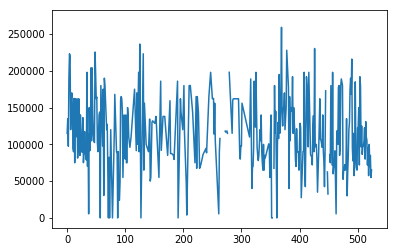

In [462]:
dt.median_sal.plot()

#### Salary Distribution 

C:\Users\r_ani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\r_ani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16., 13., 57., 92., 56., 46., 46., 20.,  8.,  2.]),
 array([     0.,  26880.,  53760.,  80640., 107520., 134400., 161280.,
        188160., 215040., 241920., 268800.]),
 <a list of 10 Patch objects>)

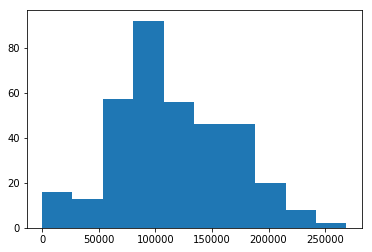

In [463]:
plt.hist(dt.median_sal)

In [464]:
dt.head()

,job_title,job_type,category,location,search_key,job_description_cleaned,low,high,median_sal
0,Data Analytics & Data Science Team Leader,Full Time,Information & Communication Technology,Melbourne,Data Science,The mission of the AFP is to provide dynamic ...,110172.0,119921.0,115046.5
1,"Consultant, Data Scientist",Full Time,Information & Communication Technology,Melbourne,Data Science,The Data Scientist will be accountable for des...,130000.0,140000.0,135000.0
2,Data Scientist,Full Time,Education & Training,Melbourne,Data Science,Data Scientist Fixed term 6 months role ...,90000.0,105000.0,97500.0
3,Sr. Machine Learning Engineer,Full Time,Science & Technology,Melbourne,Data Science,An exciting opportunity has opened up with a ...,150000.0,230000.0,190000.0
4,Senior Data Scientist,Contract/Temp,Information & Communication Technology,Melbourne,Data Science,This is an exciting opportunity to join a lead...,216000.0,230400.0,223200.0


In [465]:
dt.to_csv('final_full_clean_seek_data1.csv', index = False)

In [467]:
median_salary = dt.median_sal.median()

In [468]:
median_salary

107750.0

In [469]:
dt.shape

(368, 9)